In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.6. Cluster Variable Averages')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.6. Cluster Variable Averages/Output')
cur_date = "022823"

library(readxl)
library(tidyverse)
library(reshape2)
library(tidytext)
library(rcartocolor)
library(MetBrewer)

# reading in files
scaled_ejscreen_df = data.frame(read_excel("Input/Scaled_EJScreen_Cluster_Variables_022723.xlsx"))
scaled_housing_df = data.frame(read_excel("Input/Scaled_Housing_Cluster_Variables_022723.xlsx"))
ej_screen_geo_id_clusters = data.frame(read_excel("Input/GEO_ID_Sociodemographic_Clusters_020923.xlsx"))
housing_geo_id_clusters = data.frame(read_excel("Input/GEO_ID_Housing_Clusters_020923.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(scaled_ejscreen_df)
head(ej_screen_geo_id_clusters)

,GEO_ID,Hispanic_Latino,Less_than_High_School,Non_Proficient_English_Speakers,Population_Over_65,Population_Under_5,Poverty_Overall,Race_Non_White,Unemployed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,0.0483714,0.83345087,-0.09907552,-0.2084962,1.45508797,1.0752117,0.3312172,0.52774783
2,14000US37001020200,2.2751452,0.36768608,2.25024415,-0.7231416,0.52501516,1.6413079,0.7130681,0.98278576
3,14000US37001020300,4.1248992,0.63794466,2.89096770,0.2929533,0.60252123,0.7449890,1.0058205,0.05153347
4,14000US37001020400,1.4032867,0.75294832,1.10470812,-0.8682981,1.22256977,1.5092188,2.0919742,0.50934846
5,14000US37001020501,0.6374650,-1.15611231,1.06587639,-0.1425160,-0.09503337,-0.2079395,-0.3136866,0.63095195
6,14000US37001020502,1.6978335,0.02267513,1.70659993,-1.0266505,1.57134707,0.8110335,1.1925031,1.00586764


,GEO_ID,Cluster_3,Cluster_4
,<chr>,<dbl>,<dbl>
1,14000US37001020100,3,2
2,14000US37001020200,2,1
3,14000US37001020300,2,1
4,14000US37001020400,2,1
5,14000US37001020501,1,3
6,14000US37001020502,2,1


Plotting the average scaled value for each variable within each cluster to visualize the magnitude and directionality of each variable.

In [3]:
# combining each into 1 df
# ejscreen
ejscreen_df = inner_join(melt(scaled_ejscreen_df, variable.name = "Variable", value.name = "Value"), 
                         ej_screen_geo_id_clusters) %>%
    # averaging values for each variable within each cluster
    group_by(Cluster_3, Variable) %>%
    summarize(Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Value, .by_group = TRUE) %>%
    ungroup()

ejscreen_df$Variable = as.character(ejscreen_df$Variable)
ejscreen_df$Cluster_3 = factor(ejscreen_df$Cluster_3)

# housing
housing_df = inner_join(melt(scaled_housing_df, variable.name = "Variable", value.name = "Value"), 
                         ej_screen_geo_id_clusters) %>%
    # averaging values for each variable within each cluster
    group_by(Cluster_3, Variable) %>%
    summarize(Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Value, .by_group = TRUE) %>%
    ungroup()

housing_df$Variable = as.character(housing_df$Variable)
housing_df$Cluster_3 = factor(housing_df$Cluster_3)

head(ejscreen_df)

Using GEO_ID as id variables

Joining, by = "GEO_ID"
`summarise()` has grouped output by 'Cluster_3'. You can override using the
`.groups` argument.
Using GEO_ID as id variables

Joining, by = "GEO_ID"
`summarise()` has grouped output by 'Cluster_3'. You can override using the
`.groups` argument.


Cluster_3,Variable,Avg_Value
<fct>,<chr>,<dbl>
1,Population_Over_65,0.3058091
1,Population_Under_5,-0.2717533
1,Non_Proficient_English_Speakers,-0.3493582
1,Unemployed,-0.3635031
1,Hispanic_Latino,-0.3789516
1,Less_than_High_School,-0.3838343


# EJ Screen Cluster Variables

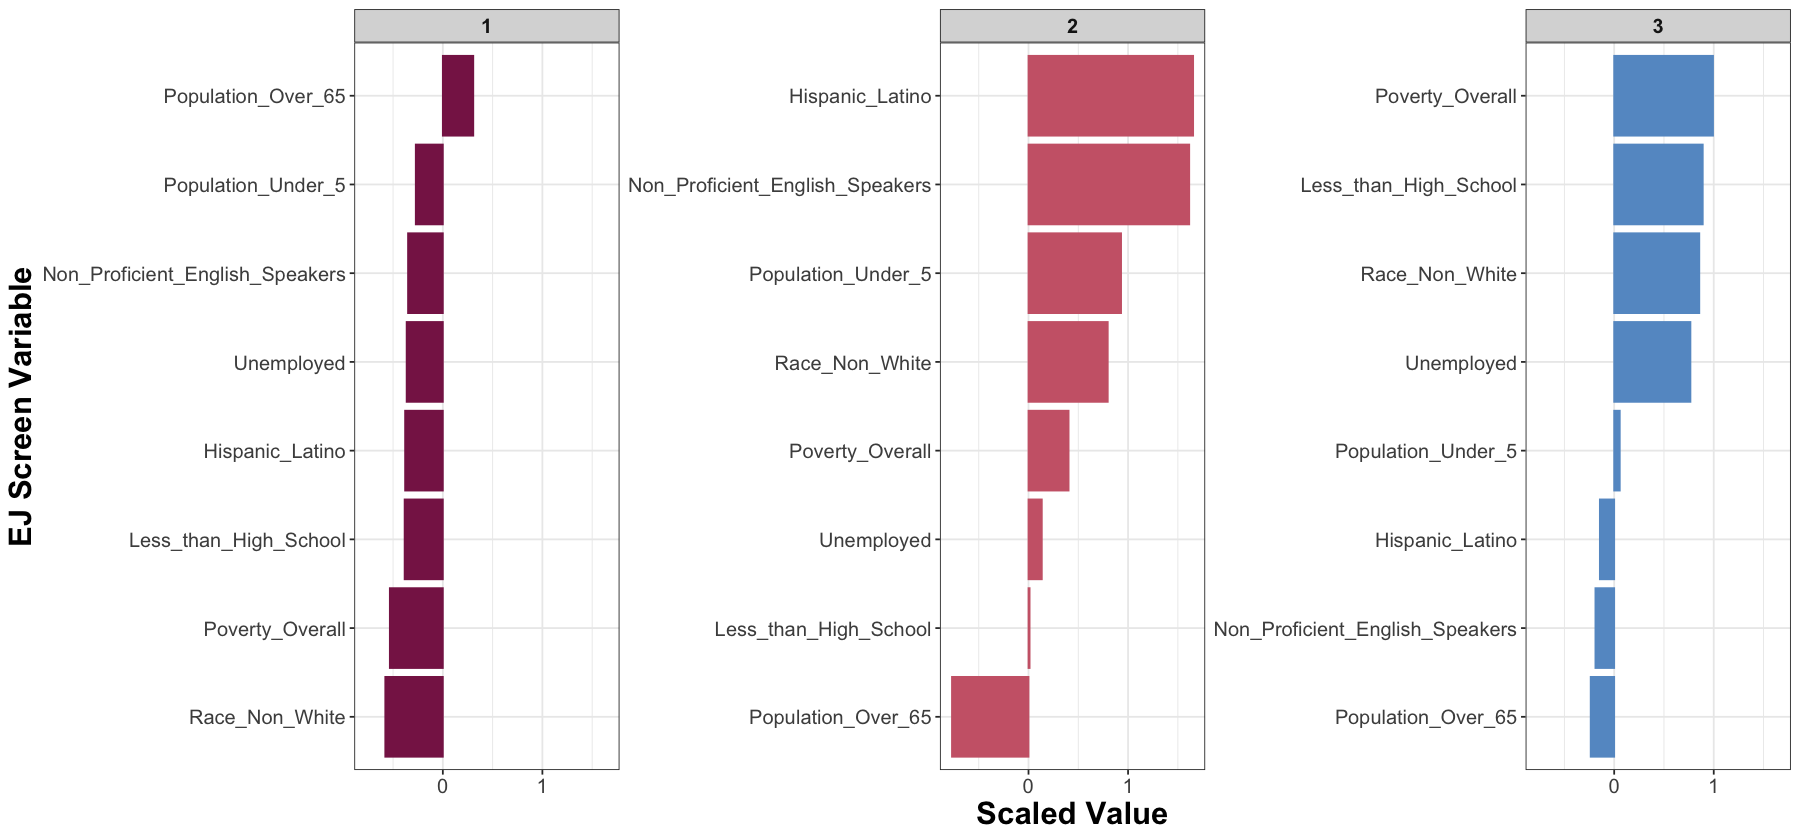

In [7]:
options(repr.plot.width = 15, repr.plot.height = 7) #changing size

# getting color palette
prism_colors = carto_pal(12, "Safe")

ggplot(data = ejscreen_df) + 
  geom_col(aes(x = Avg_Value, y = reorder_within(Variable, Avg_Value, Cluster_3), color = Cluster_3, 
               fill = Cluster_3)) + 
  # for some reason this cleans up the variables names
  scale_y_reordered() +

  facet_wrap(~Cluster_3, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = prism_colors[c(9,2,11)]) +
  scale_fill_manual(values = prism_colors[c(9,2,11)]) +

  labs(y = 'EJ Screen Variable', x = "Scaled Value")

# Housing Cluster Variables

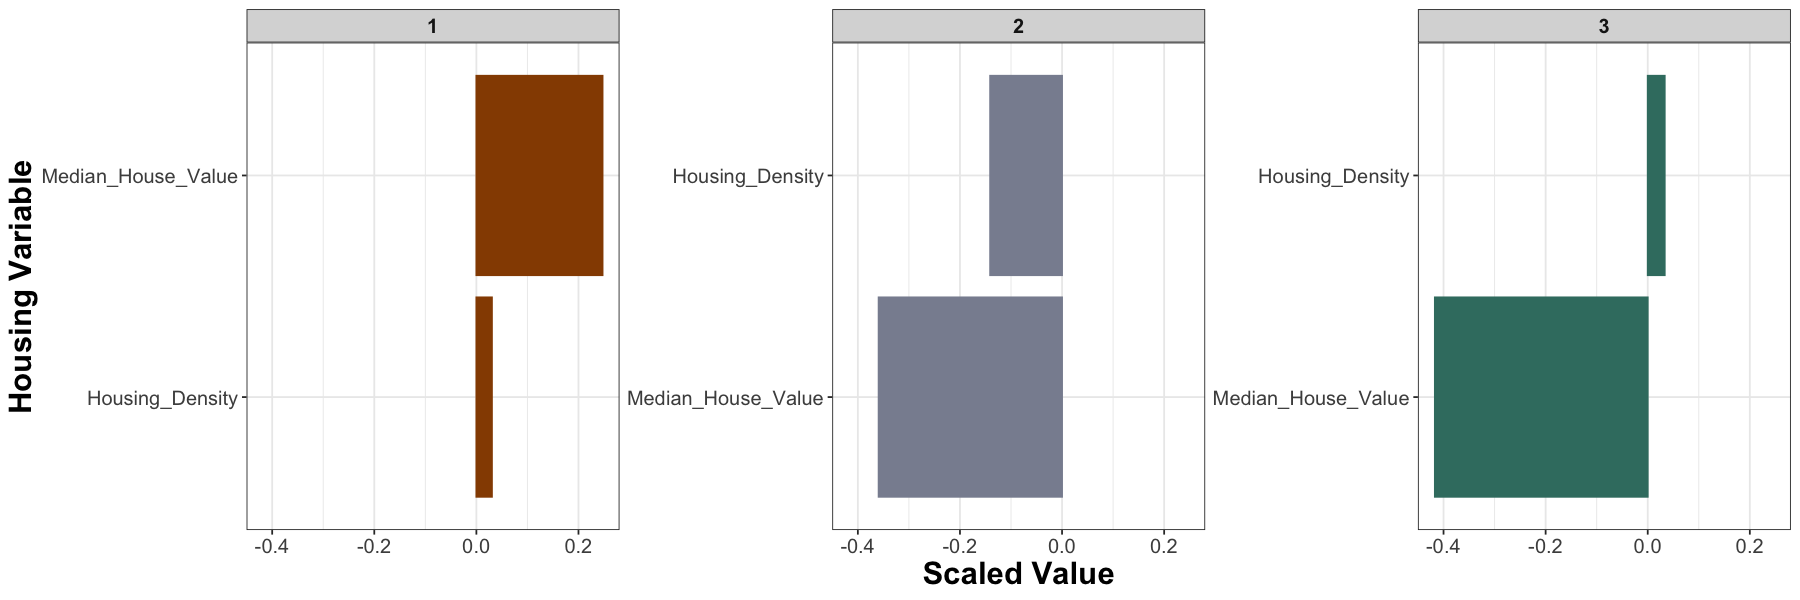

In [8]:
options(repr.plot.width = 15, repr.plot.height = 5) #changing size

# getting color palette
peru_palette = MetPalettes$Kandinsky[[1]]

ggplot(data = housing_df) + 
  geom_col(aes(x = Avg_Value, y = reorder_within(Variable, Avg_Value, Cluster_3), color = Cluster_3, 
               fill = Cluster_3)) +
  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Cluster_3, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = c("#964B00", peru_palette[c(3,1)])) +
  scale_fill_manual(values = c("#964B00", peru_palette[c(3,1)])) +

  labs(y = 'Housing Variable', x = "Scaled Value")